# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('classic')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [14]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [15]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [13]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df_yearly = df.groupby('Year').mean().reset_index()

df_yearly.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


# Visualize one of the time series, like Global Average Temperature

plt.plot(df_yearly['Year'], df_yearly['Global Average Temperature (°C)'])
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Average Temperature Over 124 Years')
#plt.grid(True)
plt.show()

## 2. Univariate Analysis

Analyze each climate variable independently.

               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+06                     1.048576e+06             1.048576e+06   
mean   1.961505e+03                     1.449954e+01             3.500280e+02   
std    3.579736e+01                     8.661005e-01             4.042409e+01   
min    1.900000e+03                     1.300000e+01             2.800000e+02   
25%    1.930000e+03                     1.375000e+01             3.149900e+02   
50%    1.962000e+03                     1.450000e+01             3.500700e+02   
75%    1.993000e+03                     1.525000e+01             3.850200e+02   
max    2.023000e+03                     1.600000e+01             4.200000e+02   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count         1.048576e+06                   1.048576e+06  
mean          1.499900e+02                   9.000896e+00  
std           8.657659e+01                   3.462551e+00  
min           0.000000e+00    

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.1111111111111111 by default and path.simplify_threshold = 0.1111111111111111 on the input).

<Figure size 800x480 with 1 Axes>

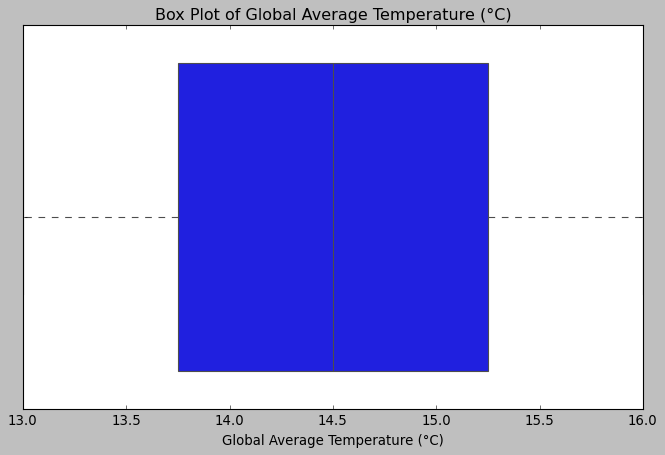

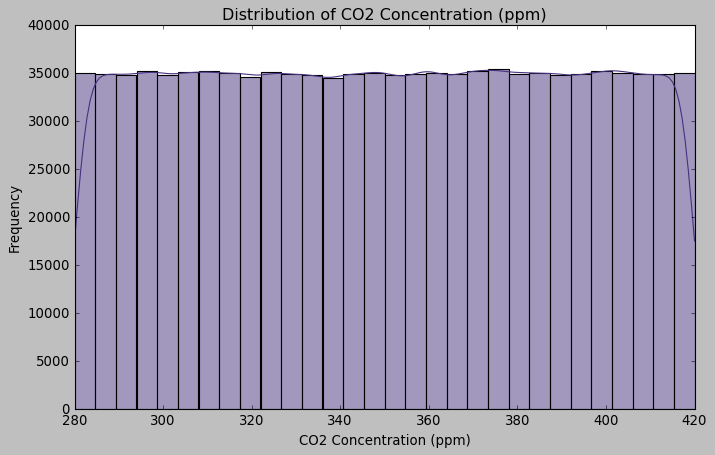

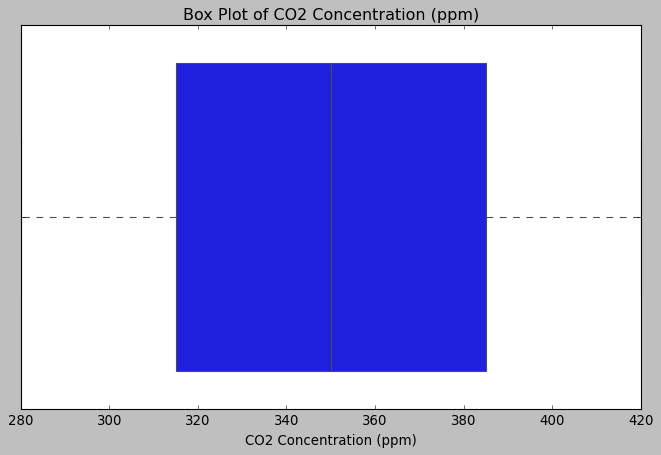

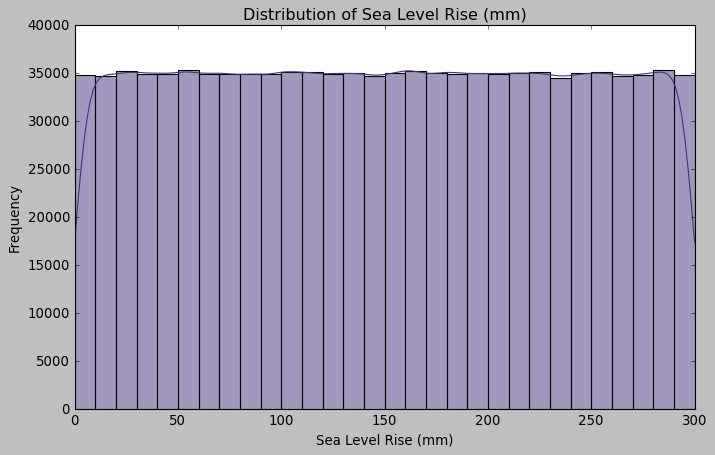

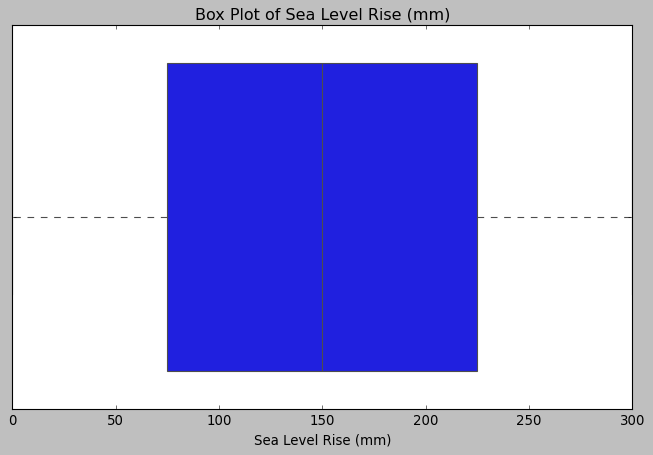

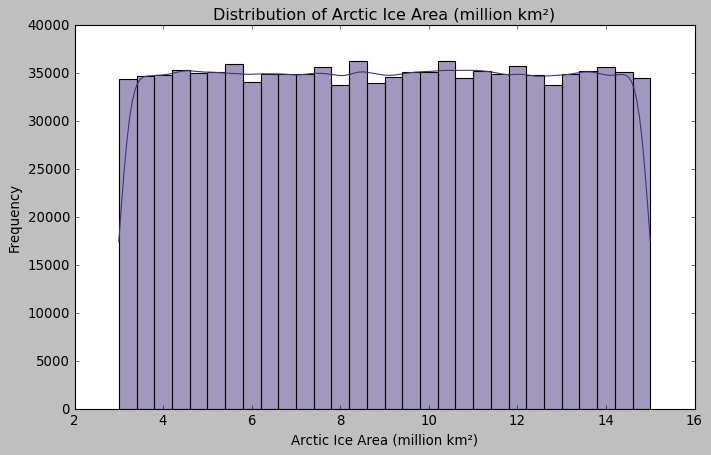

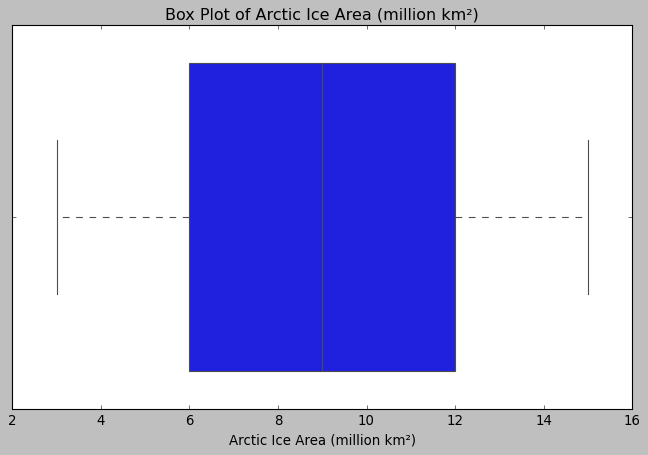

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Get descriptive statistics for the numerical columns
desc_stats = df.describe()
print(desc_stats)

# Include descriptive statistics and appropriate visualizations
# Your code here
# here visualizing global average temperature (c)
# Global Average Temperature Histogram
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Global Average Temperature (°C)'], color='blue')
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.show()

# Box plot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Global Average Temperature (°C)'])
plt.title('Box Plot of Global Average Temperature (°C)')
plt.show()

# visualizing co2 concentration (ppm)

# CO2 Concentration Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Concentration (ppm)'], kde=True, bins=30)
plt.title('Distribution of CO2 Concentration (ppm)')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Frequency')
plt.show()

# Box plot for CO2 Concentration
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CO2 Concentration (ppm)'])
plt.title('Box Plot of CO2 Concentration (ppm)')
plt.show()


#visualizing sea level rise (mm)
# Sea Level Rise Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Sea Level Rise (mm)'], kde=True, bins=30)
plt.title('Distribution of Sea Level Rise (mm)')
plt.xlabel('Sea Level Rise (mm)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Sea Level Rise
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sea Level Rise (mm)'])
plt.title('Box Plot of Sea Level Rise (mm)')
plt.show()


#visualizig artic ice area (million Km2)
# Arctic Ice Area Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Arctic Ice Area (million km²)'], kde=True, bins=30)
plt.title('Distribution of Arctic Ice Area (million km²)')
plt.xlabel('Arctic Ice Area (million km²)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Arctic Ice Area
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Arctic Ice Area (million km²)'])
plt.title('Box Plot of Arctic Ice Area (million km²)')
plt.show()



## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here